In [59]:
#Imports
import os
import sys
import tarfile
import time
import urllib.request
import pyprind
import pandas as pd
from packaging import version
import numpy as np

In [60]:
with tarfile.open('aclImdb_v1.tar.gz', 'r:gz') as tar:
    tar.extractall()

In [61]:
basepath = 'aclImdb'

labels = {'pos': 1, 'neg': 0}

# if the progress bar does not show, change stream=sys.stdout to stream=2
pbar = pyprind.ProgBar(50000, stream=2)

df = pd.DataFrame()
for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in sorted(os.listdir(path)):
            with open(os.path.join(path, file), 
                      'r', encoding='utf-8') as infile:
                txt = infile.read()
                
            if version.parse(pd.__version__) >= version.parse("1.3.2"):
                x = pd.DataFrame([[txt, labels[l]]], columns=['review', 'sentiment'])
                df = pd.concat([df, x], ignore_index=False)

            else:
                df = df.append([[txt, labels[l]]], 
                               ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:26


In [62]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [63]:
df.to_csv('movie_data.csv', index=False, encoding='utf-8')

# Start here

In [64]:
#Imports
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')

# the following is necessary on some computers:
# df = df.rename(columns={"0": "review", "1": "sentiment"})

df.head()

,review,sentiment
0,I was taken to this film by a friend and was s...,1
1,This trash version of `Romeo and Juliet' passe...,1
2,"There is a lot to like in this film, despite i...",1
3,"People have often been uncomfortable with ""The...",1
4,I don't get this. The movie obviously has a pr...,0


In [84]:
X = df["review"].values
y = df["sentiment"].values

df.shape

(50000, 2)

In [85]:
X

array(['I was taken to this film by a friend and was sceptical about a Swedish film with subtitles. However, I thoroughly enjoyed every minute of this beautiful film. The unnecessary cruelty that man is capable of was portrayed confidently without overwhelming images - although animal lovers may have to shield their eyes for a brief couple of seconds somewhere during the first 10 minutes. A traditional story of humility versus brutality and hope versus tragedy was illustrated from a satisfyingly fresh angle using a spectrum of characters with very natural flaws and features. I particularly liked how the film managed to address multiple aspects of hypocritical human behaviour that concern bias, discrimination and sanctimonious pretence. An absolute gem of a film that I will promote to all who will listen.',
       "This trash version of `Romeo and Juliet' passes in Manhattan in the present days. Romeo (Will Keenan) is an a**hole and violent member of family Que, and Juliet (Jane Jensen)

In [87]:
#import sklearn library for counting words
from sklearn.feature_extraction.text import CountVectorizer

# initialize the count vectorizer
count = CountVectorizer()

# fit the count vectorizer to the training data
bagOfWords = count.fit_transform(X)

# Get vocabulary (unique words)
vocab = count.get_feature_names_out()

# Create a dictionary of word counts
word_counts = dict(zip(vocab, bagOfWords.toarray().sum(axis=0)))

print(word_counts)

{'00': 208, '000': 619, '00000000000': 2, '0000000000001': 1, '00000001': 1, '00001': 2, '00015': 1, '000dm': 1, '000s': 1, '001': 5, '003830': 1, '006': 1, '0069': 1, '007': 76, '0079': 2, '007s': 1, '0080': 4, '0083': 3, '009': 1, '0093638': 1, '00am': 7, '00o': 1, '00pm': 6, '00s': 7, '00schneider': 1, '01': 42, '0126': 1, '0148': 1, '01pm': 1, '02': 32, '020410': 1, '0230': 1, '029': 1, '03': 14, '039': 1, '04': 14, '041': 1, '044': 1, '05': 20, '050': 1, '05nomactr': 1, '06': 33, '0615': 1, '06th': 1, '07': 18, '07b': 1, '08': 23, '087': 1, '089': 1, '08th': 3, '09': 14, '0and': 1, '0f': 3, '0ne': 1, '0r': 1, '0s': 1, '0tt': 1, '10': 8614, '100': 928, '1000': 97, '10000': 3, '1000000': 2, '10000000000': 1, '10000000000000': 3, '10000th': 1, '1000lb': 1, '1000s': 3, '1000th': 1, '1001': 3, '1004': 1, '100b': 1, '100bt': 1, '100ft': 2, '100ibs': 1, '100k': 3, '100m': 1, '100miles': 1, '100min': 2, '100mins': 1, '100mph': 1, '100s': 5, '100th': 15, '100times': 1, '100x': 4, '100yards

# Neural Network Attempt Tensorflow

In [70]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [71]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')

In [72]:
X = df['review'].values
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [74]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [75]:
# Pad sequences to ensure uniform input length
maxlen = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [78]:
# Build the model
# def model():
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=128),
    # keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [79]:
# tf_model = model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.7324 - loss: 0.5069 - val_accuracy: 0.8618 - val_loss: 0.3599
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.8972 - loss: 0.2625 - val_accuracy: 0.8800 - val_loss: 0.3010
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.9280 - loss: 0.1893 - val_accuracy: 0.8790 - val_loss: 0.3025
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.9529 - loss: 0.1323 - val_accuracy: 0.8748 - val_loss: 0.3749
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.9648 - loss: 0.0993 - val_accuracy: 0.8694 - val_loss: 0.3793


In [81]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8741 - loss: 0.3703
Test accuracy: 0.8765000104904175


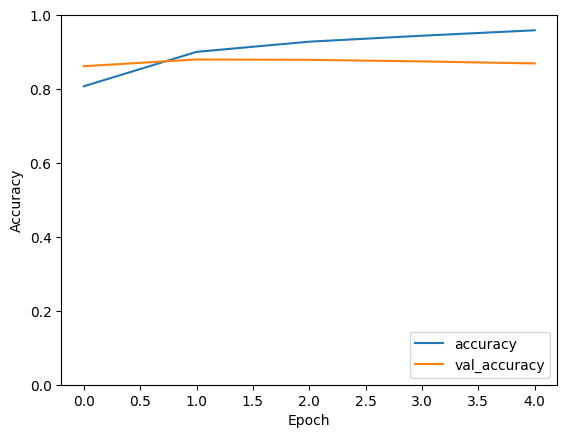

In [82]:
# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

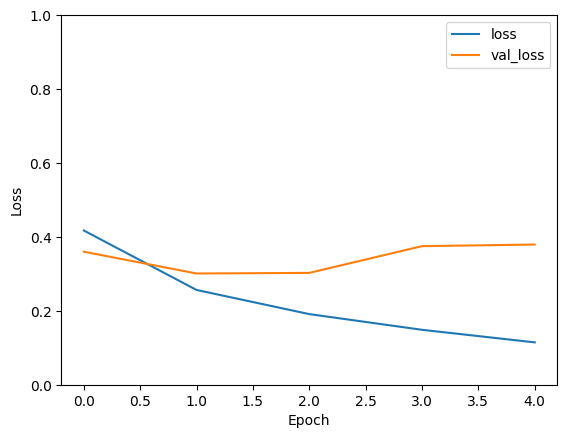

In [83]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [88]:
# Function to predict sentiment of a given text
def predict_sentiment(text, tokenizer, model, maxlen=200):
    # Preprocess the text
    seq = tokenizer.texts_to_sequences([text])
    pad_seq = pad_sequences(seq, maxlen=maxlen)
    # Predict sentiment
    pred = model.predict(pad_seq)
    return 'Positive' if pred[0][0] > 0.5 else 'Negative'

In [89]:
# Example sentences
examples = [
    "This movie was fantastic! I really enjoyed it.",
    "I hated this movie. It was terrible.",
    "It was an average movie, not too good, not too bad.",
    "The plot was boring and the acting was bad.",
    "Absolutely loved the cinematography and story."
]

In [90]:
# Display predictions
for sentence in examples:
    sentiment = predict_sentiment(sentence, tokenizer, model)
    print(f"Review: {sentence}\nPredicted Sentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Review: This movie was fantastic! I really enjoyed it.
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Review: I hated this movie. It was terrible.
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Review: It was an average movie, not too good, not too bad.
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Review: The plot was boring and the acting was bad.
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Review: Absolutely loved the cinematography and story.
Predicted Sentiment: Positive



In [91]:
# Visualize model performance with a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get model predictions for the test set
y_pred_prob = model.predict(X_test_pad)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


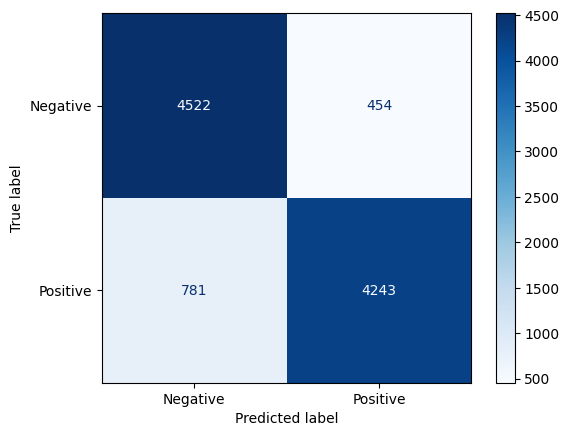

In [92]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()